In [3]:
import sqlite3

import math

class stdev:
    def __init__(self):
        self.count = 0
        self.mean = 0
        self.val = []

    def step(self, value):
        try:
            value=str(value)
            number=value.replace(" ","").replace("€","")
            self.val.append(int(number))
        except ValueError:
            #Do nothing
            return
    def finalize(self):
        try:
            #get average
            n=len(self.val)
            if n==0:
                return 0
            #print("Final number of values "+str(n))
            summa=float(sum(self.val))
            avg=summa/n
            s=float(0)
            for v in self.val:
                dx=avg-v
                dx=dx*dx
                s=s+dx
            s=s/n
            s=math.sqrt(s)

            return s
        except:
            print("Finalize failed in stdev")
            return

def getValues(specifier):
    con = sqlite3.connect("myown.db")
    con.create_aggregate("stdev", 1, stdev)
    cur = con.cursor()
    sqlite3.enable_callback_tracebacks(True)
    #cur.execute("select name, stdev(price) from cars_raw where name like '%C4%'")
    cur.execute("select name, avg(price), stdev(price), count(1) from cars_raw where name like '"
                +specifier
                +"' group by name")
    res=cur.fetchall()
    con.close()
    print(len(res))
    for r in res:
        if(r[2]==0):
            res.remove(r)
        else:
            print(r)
    return res
name='%Mercedes%'
res=getValues(name)

586
('Mercedes-Amg Amg Gt', 157864.51612903227, 3950.789907714804, 31)
('Mercedes-Amg E 63 Amg', 58945.36842105263, 1162.967357578124, 76)
('Mercedes-Benz 115 (2.2)', 1006.2477876106195, 506.0461444273278, 113)
('Mercedes-Benz 170 (1.7)', 13231.852631578948, 9636.447634818269, 190)
('Mercedes-Benz 180 (0.0)', 3833.3333333333335, 23.570226039551585, 18)
('Mercedes-Benz 180 (1.6)', 17053.727272727272, 884.9639297874198, 22)
('Mercedes-Benz 180 (1.8)', 1896.8136882129277, 4814.760742892586, 1578)
('Mercedes-Benz 180 (2.0)', 923.5598290598291, 974.7805284379086, 234)
('Mercedes-Benz 190 (1.8)', 2011.6689655172413, 1706.2265720593389, 435)
('Mercedes-Benz 190 (1.9)', 7668.906344410876, 5744.318429407599, 331)
('Mercedes-Benz 190 (2.0)', 1612.0825607064019, 1698.8427010408923, 2265)
('Mercedes-Benz 190 (2.3)', 2782.5649546827794, 2996.7207065602556, 331)
('Mercedes-Benz 190 (2.5)', 4671.947976878612, 3609.592319757921, 519)
('Mercedes-Benz 190 (2.6)', 1472.7242524916944, 787.9734016799954, 3

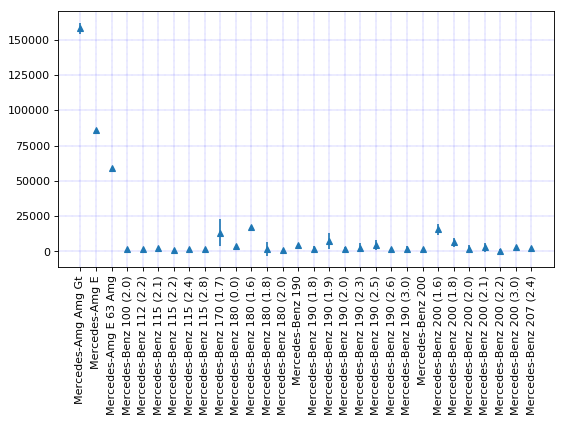

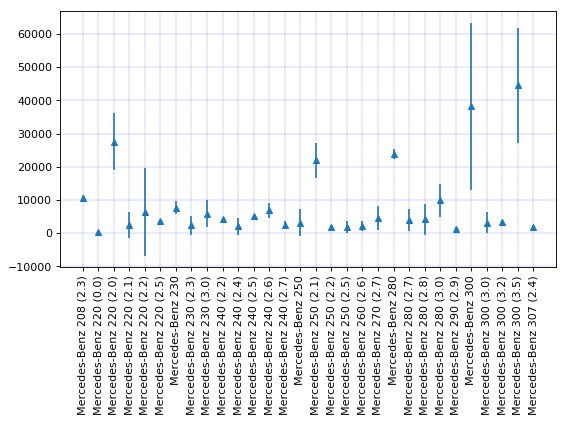

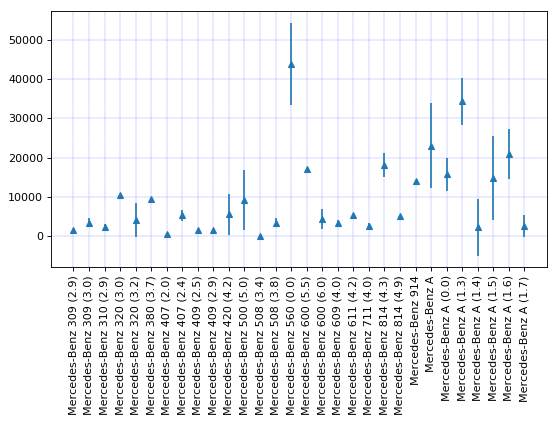

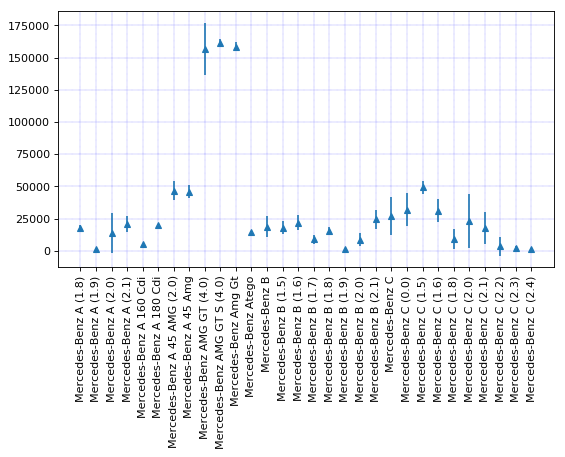

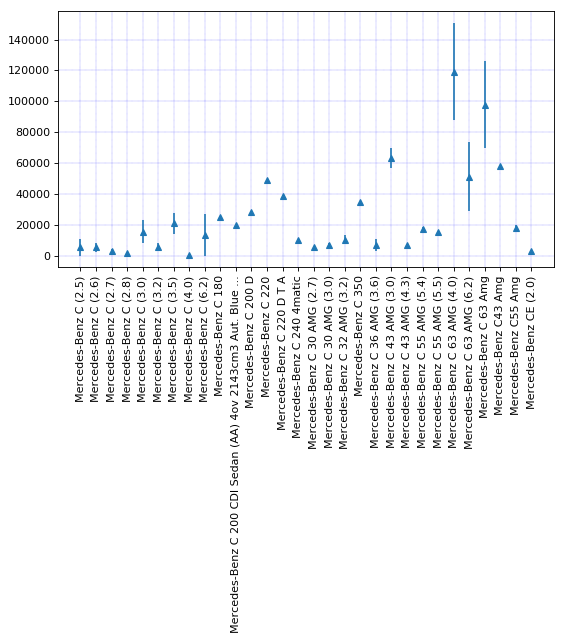

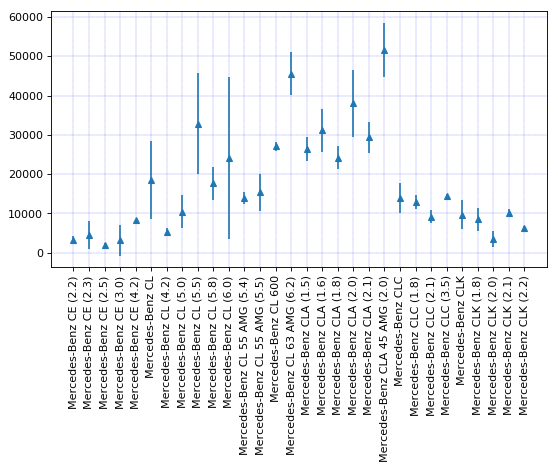

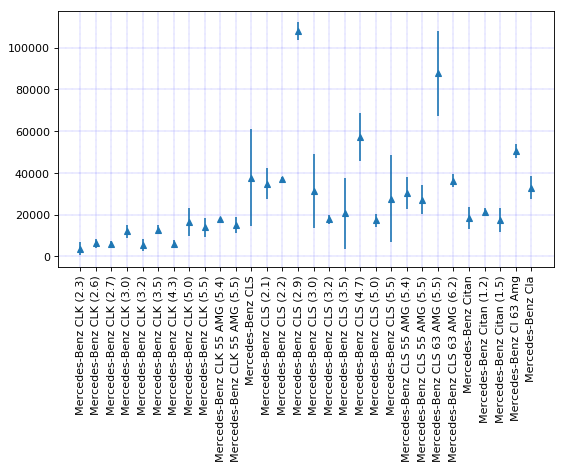

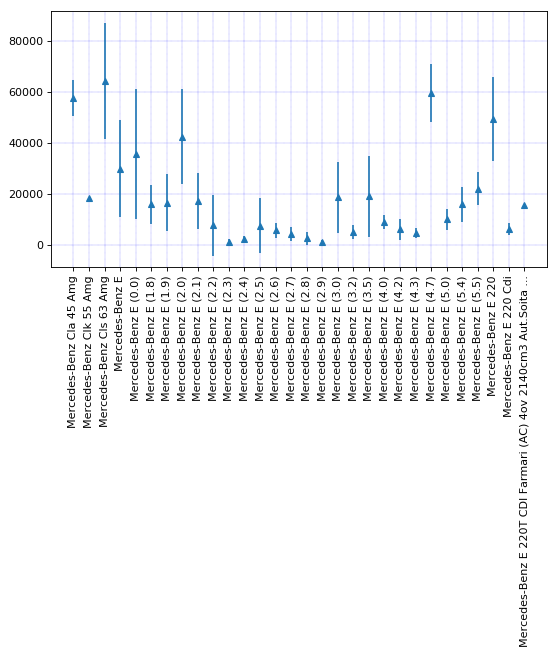

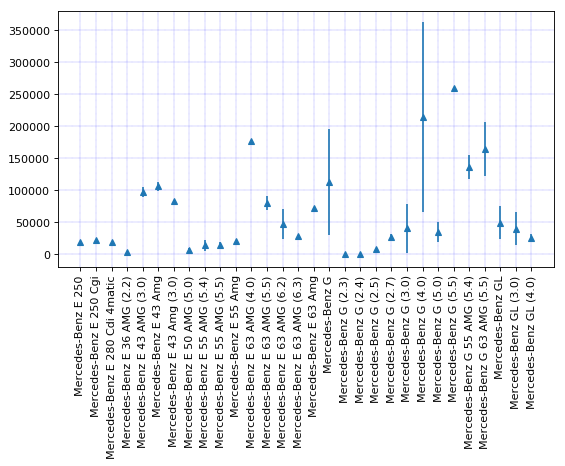

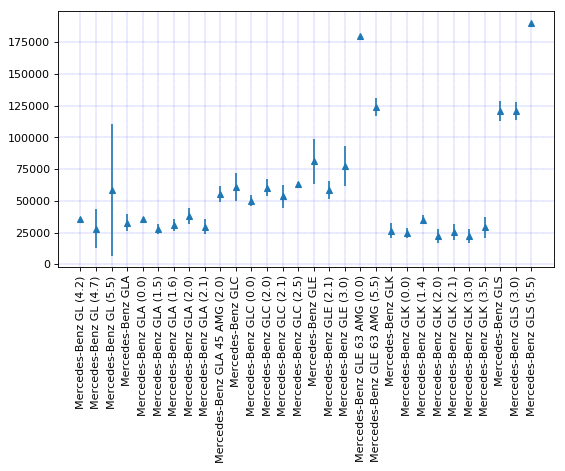

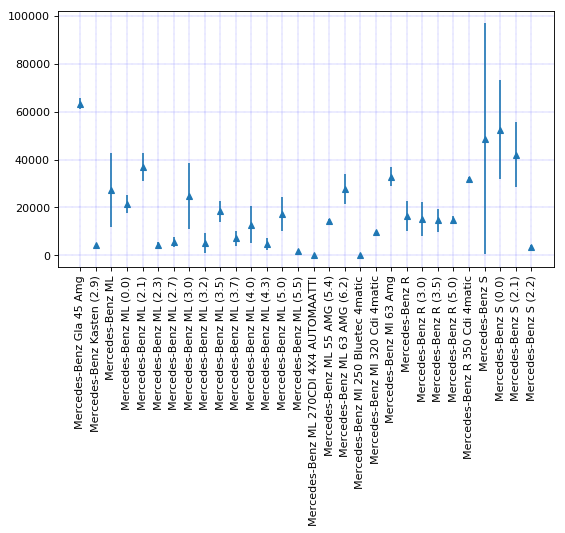

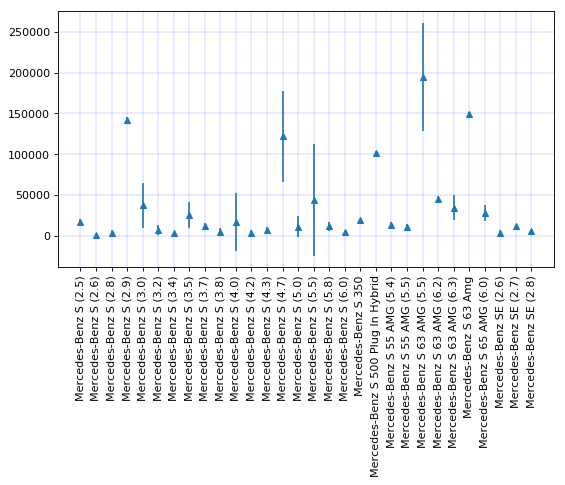

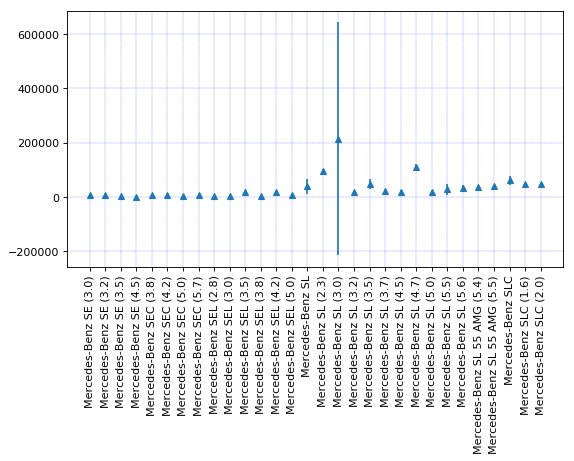

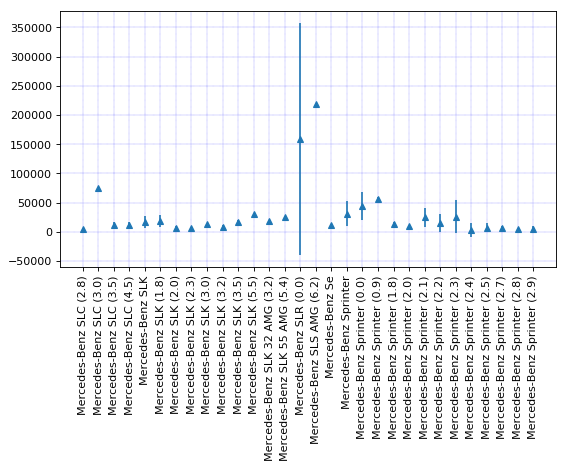

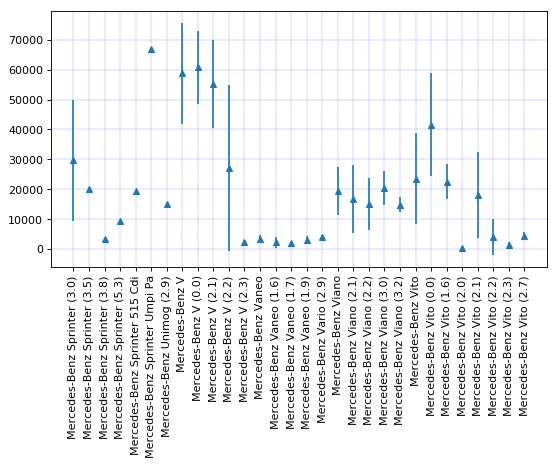

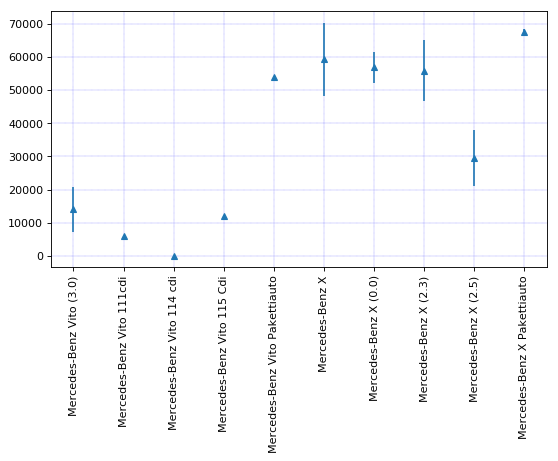

In [5]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def plotErrorbar(y,e,x,l,name):
    fig = plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
    plt.errorbar(x, y, e, linestyle='None', marker='^')
    plt.xticks(x, l, rotation='vertical')
    plt.subplots_adjust(top=0.9,bottom=0.5)
    plt.grid(color='blue', linestyle='--', linewidth=0.2)
    plt.savefig(name)
    plt.show()

count=1
total=1
y=[]
e=[]
x=[]
l=[]
for r in res:
    l.append(r[0])#label
    y.append(r[1])#y-val
    e.append(r[2])#x-val
    x.append(count)#counter
    count=count+1
    if count > 30:
        name="img"+str(total)+".png"
        total=total+1
        plotErrorbar(y,e,x,l,name)
        count=1
        y=[]
        e=[]
        x=[]
        l=[]
name="img"+str(total)+".png"
plotErrorbar(y,e,x,l,name)